In [28]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import shutil
import os
import time

In [23]:
video_file = 'hobbit.mp4'

os is a useful library to interact with files

In [26]:
direct = os.getcwd()

In [29]:
os.listdir(direct)

['.ipynb_checkpoints',
 '4 - Pandas.ipynb',
 'Ex 4 - Study of a movies dataset.ipynb',
 'hobbit.mp4',
 'movies.csv',
 'Sem 4 - opencv.ipynb',
 'test.csv',
 'wine.csv']

In [30]:
os.path.isfile(video_file)

True

In [31]:
cap = cv2.VideoCapture(video_file)

fps = cap.get(cv2.CAP_PROP_FPS)
Nf = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
Lx = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
Ly = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

movie = []

while(cap.isOpened()):
    ret, frame = cap.read()

    try:
#         cv2.putText(frame,'They are taking the hobbits to Isengard',(10,100),
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('frame',gray)
        movie.append(gray)
        delay = int(1000/fps)
    except:
        break
    
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
movie = np.array(movie)

In [33]:
movie.shape

(982, 264, 640)

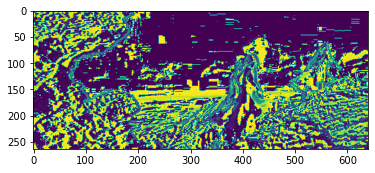

In [39]:
plt.imshow(movie[110,:,:]-movie[109,:,:])

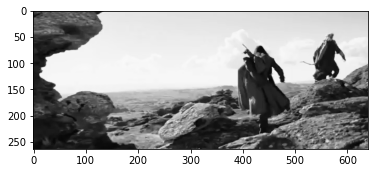

In [36]:
plt.imshow(movie[120,:,:],cmap = 'Greys_r')

In [37]:
av_intensity = np.average(np.average(movie[:,:,:],axis=2),axis=1)

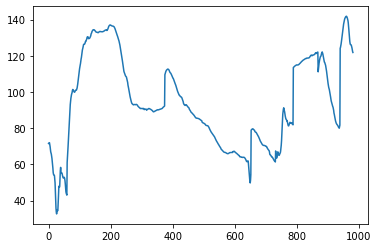

In [38]:
plt.plot(av_intensity)

In [29]:
fout = 'hobbit_cropped.avi'

In [34]:
cap = cv2.VideoCapture(video_file)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(fout, fourcc, 20.0, (Lx,Ly))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame,0)
#         frame = frame[:,:int(Lx/2),:]
        # write the flipped frame
        out.write(frame)

        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

In [37]:
int(Lx/2)

320